# Visualization

In this boot camp we're going to learn how to:
- Read in data tables (the east way!)
- Select different samples from the data set
- Make figures to visualize the data

# Reading in data
Often, you will be given data in the form of an ASCII table.  This table will have multiple rows that indicate a star, or a galaxy, or a particle in a simulation, and the columns indicate different properties for the object such as its ID, brightness, mass, or distance.  Before we can select different samples of objects to study, we need to read in this data.  There are many ways to do this in Python: numpy, pandas, and astropy are commonly used packages.

- Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
- Astropy: http://docs.astropy.org/en/stable/io/ascii/

Let's first import these packages. Again, use CTRL-ENTER to execute each cell.

In [ ]:
import numpy as np
import pandas as pd
from astropy.io import ascii

Let's start with an example of reading in data into a Pandas `DataFrame`. Just as a `numpy` array is like a python list with extra super-powers, you can think of a Pandas `DataFrame` as an augmented `numpy` array with extra member functions to help you work with the data.

First you will need to obtain the data. Use [this link](https://users.obs.carnegiescience.edu/~cburns/Bootcamp/SNIa_DM.dat) to download the data file and save it somewhere. Use the file's location (e.g., your `Downloads` folder) in the next command (otherwise, you'll get an error).

In [ ]:
data1=pd.read_csv('/Users/cburns/Downloads/SNIa_DM.dat',delim_whitespace=True, skiprows=4)

Note that we had to tell Pandas to skip the first 4 rows (comments) and use white-space (spaces and tabs) to delimit the columns.

We can now look at the properties of data1.  Such as its dimensions:

In [ ]:
print(data1.shape)

There are 281 rows and 5 columns.  What are the names of the columns?

In [ ]:
print(data1.columns.values)

And what if we want to peak at all of the properties of the first 5 SN? Pandas `DataFrames` act just like arrays in this respect. Use the `numpy` array slicing you learned in our last tutorial to print out only the first 5 rows of `data1`.

We can also just select specific columns by using the names you found above.

In [ ]:
print(data1['DM'])

Now see if you can print out just the first 5 rows of the `'DM'` column. Try other combinations of column names and row slices.

Note that the index is always shown here.  If we just want the raw data in the form of a numpy array, we just do the following:

In [ ]:
print(data1['DM'][:5].values)

Next, we do a similar exercise reading in the data into an astropy Table:

In [ ]:
data2=ascii.read('/Users/cburns/Downloads/SNIa_DM.dat')

print(data2.colnames)
print(data2[:5])
print(data2['DM'][:5])

Note that the `astropy.ascii` package requires fewer arguments (it's a little smarter about comments and delimiters), but `astropy` tables have a bit less functionality. Luckily, the `astropy` developers recognise that Pandas is pretty awesome, so you can convert an Astropy `Tables` object to a Pandas `DataFrame` object! (You can also convert Pandas DFs to Astropy Tables)

In [ ]:
data3=data2.to_pandas()
print(data3[:5])

## Writing data
Writing data in Pandas is just as simple as reading it in:

In [ ]:
data3.to_csv('/Users/cburns/Downloads/output.dat',index=False,sep=' ')
# the 'index' keyword gives you the option of also printing the Pandas index
# the 'sep' keyword specifies the delimiter between columns

# Selecting Data
Most of the time you will be dealing with subsets of your data set, e.g., galaxies at a certain redshift, stars at a particular distance or brightness, you want to get rid of outliers, etc.  We therefore need to select the desired sample using conditionals.  We'll use a Pandas DataFrame as an example here.

In [ ]:
ix=(data1['zcmb']<0.02) & (data1['survey']==1)

print(data1[['zcmb','survey']][ix])

We could also have accomplished the above using numpy's `where` function:

In [ ]:
ix=np.where((data1['zcmb']<0.02) & (data1['survey']==1))[0]

# Note the different way of subscripting the Pandas DataFrame here
print(data1.loc[ix,['zcmb','survey']])

# Plotting
The most popular plotting package in Python is `matplotlib` but there are several others one might want to explore.  Here we will show you how to make basic plots in matplotlib.  The references below are useful:

- http://matplotlib.org/gallery.html
- http://matplotlib.org/api/pyplot_api.html

First, let's invoke an iPython magic command (i.e., %) so that the plots that are made will show up in this notebook.

In [ ]:
%matplotlib inline

`pyplot` is the main plotting function in `matplotlib`, it is commonly imported on its own as `plt`.

In [ ]:
import matplotlib.pyplot as plt

Now let's make some fake data to play with and plot. This is just a suggestion, try your own functions, maybe even some random numbers!

In [ ]:
x=np.arange(10.)
y=x**2

Armed with this data, this is now probably the quickest way to make a figure:

In [ ]:
plt.plot(x,y,'bo')
plt.show()

# The string 'bo' above indicates that the points will be blue(b) circles(o)

Note that `matplotlib` does a lot of things automatically for you, like setting the limits on the axes.  As well as the interval between major tick marks.  These are all things that you can adjust manually with more code.

Below is the long form to getting the same symbols as above.  By including more code, you can start to tinker around with different aspects of the plot. Many of matplotlib's optional arguments have a long and short form (e.g., you can specify `linestyle='-'` or the shorter `ls='-'`. Try different linestyles: '--', '-.'. Try different symbols: 's', 'd', '*'.

In [ ]:
plt.plot(x,y,color='blue',marker='o',ms=6,ls='None')
plt.show()

Yet another way to make the same plot, using the `scatter` function:

In [ ]:
plt.scatter(x,y,s=30,color='blue',edgecolors='black')
plt.show()

The above examples are the quickest, easiest ways to produce a figure in `matplotlib`.  However, you'll find that including more lines of code will make things easier down the road as it will provide for more functionality.  Below, we invoke the `subplots` function, which returns `figure` and `axis` objects.  We can also play around with the colors, symbols, and line styles. This way of using `matplotlib` is more *pythonic*. The previous way was more akin to using `MATLAB` and it was the developer's intention to make it more intuitive. Most examples use the *pythonic* methods.

In [ ]:
fig, ax = plt.subplots()

# We then use ax to do our plotting
ax.plot(x,y,color='royalblue',marker='*',ms=15,ls='None')
ax.plot(x,y,color='red',ls='-',lw=2,alpha=0.5)
plt.show()

So this produces the same kind of plot as above, but now we can use `ax` to play with the axes:

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim((0,200))           # set limits on y-axis
ax.set_xlabel('x',fontsize=15) # set label for x-axis
ax.set_ylabel('y',fontsize=15) # set label for y-axis
ax.plot(x,y,color='mediumseagreen',marker='s',ms=15,ls='None')
ax.plot(x,y,color='darkorange',ls='--',lw=2)
plt.show()

Often, you'll want an axis to be on a logarithmic scale:

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log') # set y-axis to be in log

ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.plot(x,y,color='gold',mec='mediumvioletred',mew=2,marker='p',ms=25,ls='None')
ax.plot(x,y,color='mediumvioletred',ls='-.',lw=2)
plt.show()

## Multiple figures

Sometimes you'll want two figures side-by-side, or a grid of 3x3, etc, etc...

In [ ]:
# two figures, side by side:
fig, axarr = plt.subplots(1,2,figsize=(10,5))

# axarr is an array of axis objects, with each element representing one subplot

# first subplot
ax=axarr[0]
ax.plot(x,y,color='blue',marker='s',ms=15,ls='None')

# second subplot
ax=axarr[1]
ax.plot(x,y,color='red',marker='*',ms=15,ls='None')

# change title on first subplot
ax=axarr[0]
ax.set_xlabel('x',fontsize=16)

plt.show()

Using subplots, which returns an axis array, is useful for going back and forth between different figures.  Note how we can go back to `axarr[0]` at the end and change the label on the x axis.

If you have a bunch of images or the same type of figure for multiple objects, it helps to make a giant grid of subplots.  And rather than manually declaring a new subplot each time, it helps to automate the process with `for` loop(s).

In [ ]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6))

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1: ax.set_yscale('log')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)

fig.tight_layout() # try without this!
plt.show()


`subplots` has many useful features, like the the `sharex` and `sharey` keywords, which allow you to declare that the axes for each subplot have the same scale.  Invoking `subplots_adjust` can then optionally allow you to squish the subplots together. 

In [ ]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0)

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1:
            ax.set_xlabel('x',fontsize=16)
        if jj==0:
            ax.set_ylabel('y',fontsize=16)
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)

plt.show()

# Labeling
Legends, text labels, Latex

In [ ]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
# The `label` keyword below is used to specify the label for the particular data set
ax.plot(x,y1,color='blue',mec='orange',mew=2,marker='*',ms=20,ls='None',label='$y=x^2$')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='$y=\sqrt{x}$')
ax.text(6,10,'$y=x^{n}$',fontsize=24)
ax.legend(loc='upper left',fontsize=16,numpoints=1)
plt.show()

## Other useful types of figures: 
- Error bars: We're scientists! Almost every data point you put on a figure should have an error bar.
- Histograms: useful for looking at distribution of values for a particular variable
- Images: e.g., cutouts of stars, galaxies, nebulae, etc.
- Many others that we don't have time to cover here!

Error bars:

In [ ]:
# first, generate some fake data
x=np.arange(10)+1.
y=x**2

xerr=np.zeros(10)+0.5 # fixed error in x
yerr=np.sqrt(y) # Poisson error in y

plt.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ls='None')
plt.show()


Histogram of Gaussians:

In [ ]:
import numpy.random as npr

x1=npr.randn(10000)        # mean=0, std=1.0
x2=npr.randn(10000)*0.5+1. # mean=1, std=0.5

bins=np.linspace(-5.,5.,21)

info1 = plt.hist(x1,bins=bins, color='red',alpha=0.5,lw=0)
info2 = plt.hist(x2,bins=bins, color='blue',alpha=0.5,lw=0)
plt.show()


 Display an image from a FITS file.  First download this file: [im3433.fits](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/im3433.fits)

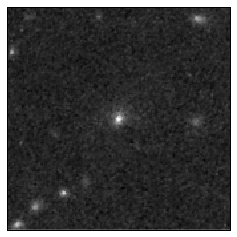

In [5]:
# Display an image from a FITS file

from astropy.io import fits

im3433=fits.open('/Users/cburns/Downloads/im3433.fits')
im=im3433[0].data # the first extension (i.e., index 0), contains the image data

fig, ax = plt.subplots()
ax.imshow(im,interpolation='none',origin='lower',cmap='gray')
ax.get_xaxis().set_visible(False) # comment these two lines to see what happens
ax.get_yaxis().set_visible(False)
plt.show()


# Doing some math on images

Here's another example using some supernova data, which you can download here: [SN2011iv_B_SWO_DC_2011_12_11SN.fits](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/SN2011iv_B_SWO_DC_2011_12_11SN.fits), [SN2011iv_B_template.fits](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/SN2011iv_B_template.fits).

We will plot these two images side-by-side. We specify `vmin=-40` and `vmax=40` in the `imshow()` function, which will set appropriate
limits on the color map (there are saturated pixels that will cause the image to be washed out otherwise). We also choose the
reverse color map (`gray_r`). Question: where's the supernova? 

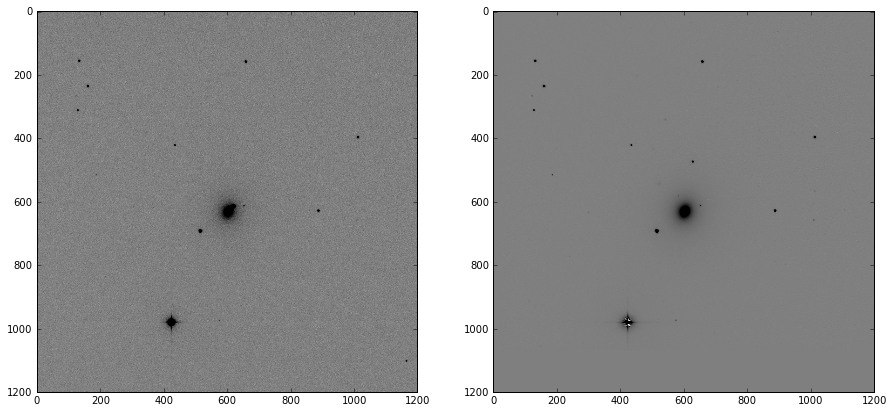

In [8]:
im1 = fits.open('data/SN2011iv_B_SWO_DC_2011_12_11SN.fits')
im2 = fits.open('data/SN2011iv_B_template.fits')
fig,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(im1[0].data, vmin=-40,vmax=40, cmap='gray_r')
ax[1].imshow(im2[0].data, vmin=-40, vmax=40, cmap='gray_r')

These two images are from different epochs. So if you subtract one from the other and plot out the results, the supernova (and anything else that changed) should stand out. Try this. There's a surprise.

## Saving a figure to a directory
Inline plotting like what we've been doing above is useful for quick viewing, but most of the time you'll want to save your figure to a folder somewhere and in a specific format.  Let's save one of the figures above to disk:

In [ ]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(x,y1,color='blue',marker='*',ms=15,ls='None',label='$y=x^2$')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='$y=\sqrt{x}$')
ax.text(6,10,'Hi there!')
ax.legend(loc='upper left',fontsize=16,numpoints=1)

# Note these two lines
fig.savefig('exampe.pdf',format='pdf')
plt.close()


# Analyze one of these data sets by making figures...
Now that you've learned the basics of Python and its plotting package, `matplotlib`, download one of these data sets, make some figures, and tell us what you see:
- **Galaxies**: 
    - Data: [galsample1.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample1.dat), [galsample2.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample2.dat)
    - The two files represent two different galaxy samples.  The columns represent, (1) the galaxy ID, (2) right ascension (RA) in units of decimal degrees, (3) declination (Dec) in units of decimal degrees (i.e., latter two columns are similar to longitude and latitude, but project on the sky), (4) the redshift (i.e., a measure of the recession velocity due to the Doppler shift of light from the galaxy.  If one assumes a cosmology, the redshift translates into a distance), (5), the total stellar mass of the galaxy in units of $\log(M/M_{\odot})$, and (6) the star formation rate of the galaxy in units of $M_{\odot}~{\rm yr}^{-1}$.
        - What is the difference between the two samples? Qualitatively, and quantitatively?
- **Supernovae**:
    - Data: [SNIa_DM.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/SNIa_DM.dat)
    - There are five columns: SN name, redshift (`zcmb`), Distance modulus (`DM`), error `eDM`, and a survey number.
    - Try plotting a Hubble diagram (`DM` vs. `zcmb`) with errorbars.
    - Use logarithmic x-axis to make the Hubble diagram straight.
    - Plot the two different surveys in different colors/symbols.
    - Try plotting different *theoretical* Hubble laws (with different Hubble constants) with lines:
      $$ DM = -5\log_{10}\left(\frac{cz}{H_0}\right) + 25 $$
    - Do chi-by-eye to meausre $H_0$.